## Lesson 3: The `history` Function

The `history` function allows us to get trailing windows of historical pricing and volume data in Research. It requires 5 arguments: the contracts for which we want data, the data fields, a lookback frequency, and the start and end dates for the lookback window. Possible fields include `'price'`, `'open_price'`, `'high'`, `'low'`, `'close_price'`, `'volume'` and `'contract'`. Possible frequencies are `'daily'` and `'minute'`.

Let's start by importing the `history` function from research's experimental library: 

In [1]:
from quantopian.research.experimental import history

The return type of `history` depends on the input types of the `symbols` and `fields` parameters. If a single `Future` reference and a single field are specified, `history` returns a <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html">pandas Series</a>: 

In [2]:
clf16_price = history(
    'CLF16', 
    fields='price', 
    frequency='daily', 
    start='2015-10-21', 
    end='2015-12-21'
)

clf16_price.head()

2015-10-21 00:00:00+00:00    45.97
2015-10-22 00:00:00+00:00    46.27
2015-10-23 00:00:00+00:00    45.65
2015-10-26 00:00:00+00:00    44.63
2015-10-27 00:00:00+00:00    44.30
Freq: C, Name: Future(1058201601 [CLF16]), dtype: float64

When a list of `Futures` and a single field are specified, the return type is a <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html">pandas DataFrame</a> indexed by date, with assets as columns:

In [3]:
cl_fgh_16_volume = history(
    symbols=['CLF16', 'CLG16', 'CLH16'], 
    fields='volume', 
    frequency='daily', 
    start='2015-10-21', 
    end='2015-12-21'
)

cl_fgh_16_volume.head()

,Future(1058201601 [CLF16]),Future(1058201602 [CLG16]),Future(1058201603 [CLH16])
2015-10-21 00:00:00+00:00,21833.0,2949.0,1725.0
2015-10-22 00:00:00+00:00,17198.0,2150.0,1544.0
2015-10-23 00:00:00+00:00,27287.0,3544.0,1849.0
2015-10-26 00:00:00+00:00,18940.0,2745.0,1457.0
2015-10-27 00:00:00+00:00,22071.0,3211.0,2638.0


And if we pass a list of Futures and a list of fields, we get a <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Panel.html">pandas Panel</a> indexed by field, having date as the major axis, and assets as the minor axis.

To see the full doc string for `history`, run the cell at the <a href="#history_doc">end of this notebook.</a>

### Futures Pricing & Volume

Now, let's use `history` to get the close price and volume for the Crude Oil contract with delivery date in January 2016 (`CLF16`), for the 2 months leading up to its delivery date (`2015-12-21`).

In [4]:
clf16 = symbols('CLF16')

clf16_data = history(
    clf16, 
    fields=['price', 'volume'], 
    frequency='daily', 
    start='2015-10-21', 
    end='2015-12-21'
)

clf16_data.head()

,price,volume
2015-10-21 00:00:00+00:00,45.97,21833.0
2015-10-22 00:00:00+00:00,46.27,17198.0
2015-10-23 00:00:00+00:00,45.65,27287.0
2015-10-26 00:00:00+00:00,44.63,18940.0
2015-10-27 00:00:00+00:00,44.30,22071.0


All pricing values for futures contracts correspond to unit prices. For a `CL` contract, this value denotes the price per barrel, and a single contract represents 1000 barrels (`multiplier`). In backtesting, if you hold a particular contract, the value of your portfolio will change by an amount equal to the change in price of the contract (unit price) * the multiplier.

Plotting price and volume will give us a better idea of how these values change over time for this particular contract.

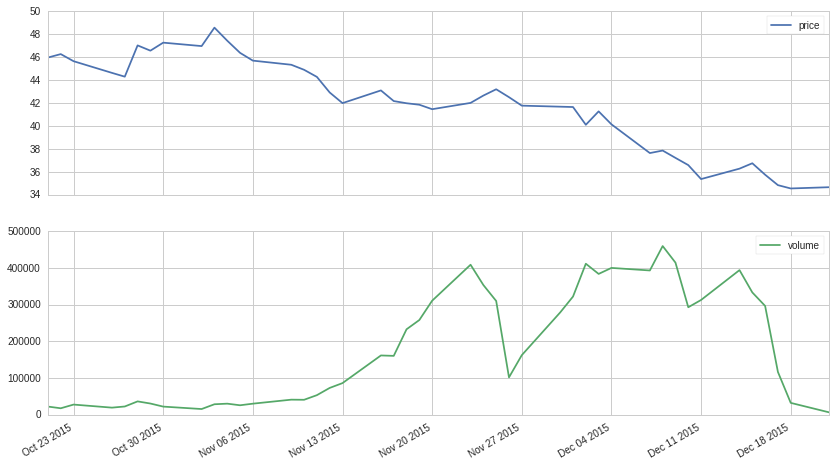

In [5]:
clf16_data.plot(subplots=True);

Notice the rise and subsequent drop in trading volume prior to the delivery date of the contract? This is typical behavior for futures. Let's see what the volume looks like for a chain of consecutive contracts.

In [6]:
cl_contracts = symbols(['CLF16', 'CLG16', 'CLH16', 'CLJ16', 'CLK16', 'CLM16'])

cl_consecutive_contract_volume = history(
    cl_contracts, 
    fields='volume', 
    frequency='daily', 
    start='2015-10-21', 
    end='2016-06-01'
)

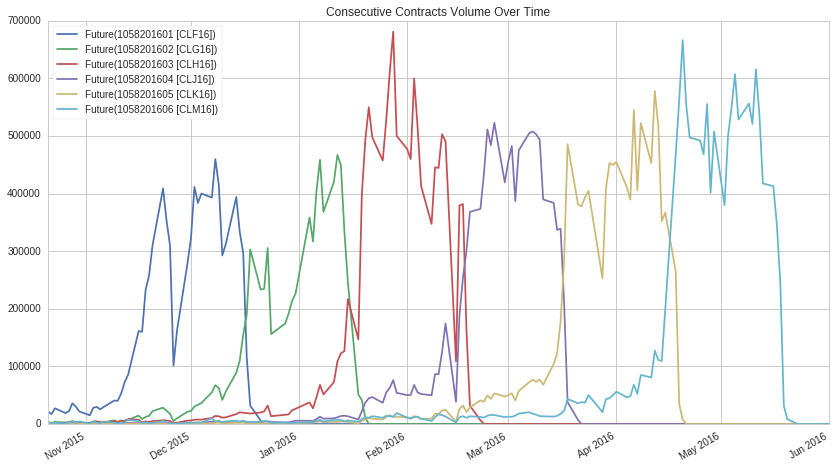

In [7]:
cl_consecutive_contract_volume.plot(title='Consecutive Contracts Volume Over Time');

Trading activity jumps from one contract to the next, and transitions happen just prior to the delivery of each contract.

As you might imagine, having to explicitly reference a series of transient contracts when trading or simulating futures can make it difficult to work with them. In the next lesson we introduce a solution to this problem in the form of Continuous Futures.

<a></a></a>

In [8]:
print history.__doc__


    Load a table of historical trade data.

    Parameters
    ----------
    symbols : Asset-convertible object, ContinuousFuture, or iterable of same.
        Valid input types are Asset, Integral, basestring, or ContinuousFuture.
        In the case that the passed objects are strings, they are interpreted
        as ticker symbols and resolved relative to the date specified by
        symbol_reference_date.

    fields : str or list
        String or list drawn from {'price', 'open_price', 'high', 'low',
        'close_price', 'volume', 'contract'}.

    start : str or pd.Timestamp
        String or Timestamp representing a start date or start intraday minute
        for the returned data.

    end : str or pd.Timestamp
        String or Timestamp representing an end date or end intraday minute for
        the returned data.

    frequency : {'daily', 'minute'}
        Resolution of the data to be returned.

    symbol_reference_date : str or pd.Timestamp, optional
        String 